In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("SuperMarket Analysis.csv")
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [4]:
data.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


<BarContainer object of 1000 artists>

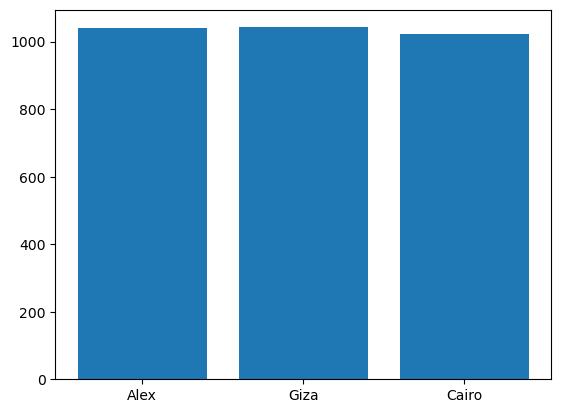

In [5]:
#plot branch vs sales
x=data["Branch"]
y=data["Sales"]
plt.bar(x,y)

<BarContainer object of 1000 artists>

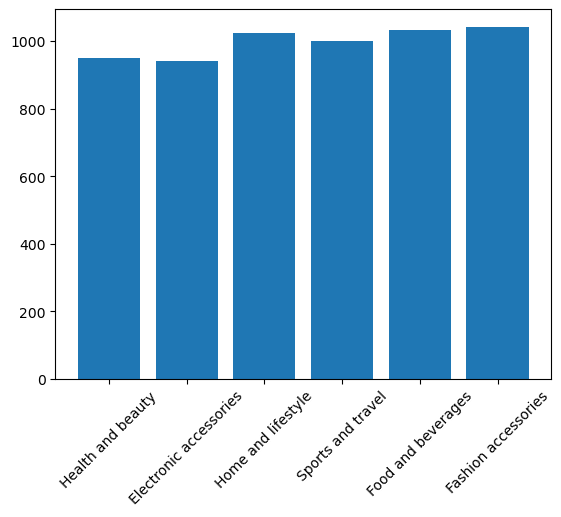

In [6]:
#plot product line vs sales
x=data["Product line"]
y=data["Sales"]
plt.xticks(rotation=45)
plt.bar(x,y)

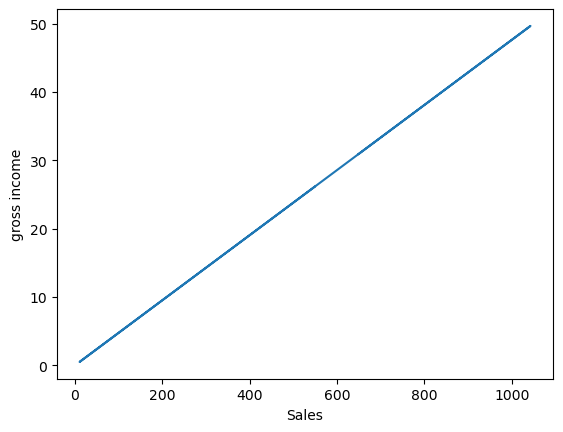

In [7]:
#plot slaes vs gross income
x=data["Sales"]
y=data["gross income"]
plt.xlabel("Sales")
plt.ylabel("gross income")
plt.plot(x,y)

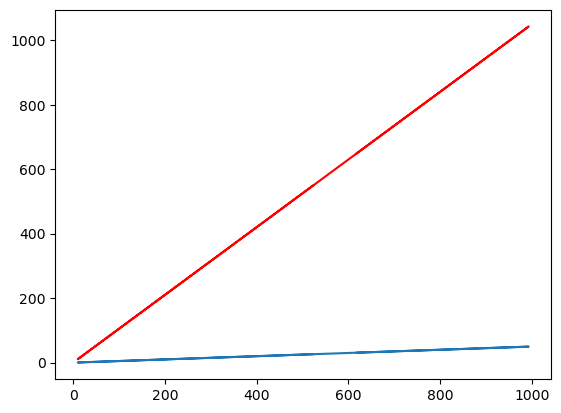

In [8]:
x=data["cogs"]
y=data["Sales"]
plt.plot(x,y,c="r")
x=data["cogs"]
y=data["gross income"]
plt.plot(x,y)

<Axes: title={'center': 'customer rating'}, xlabel='Customer type', ylabel='Rating'>

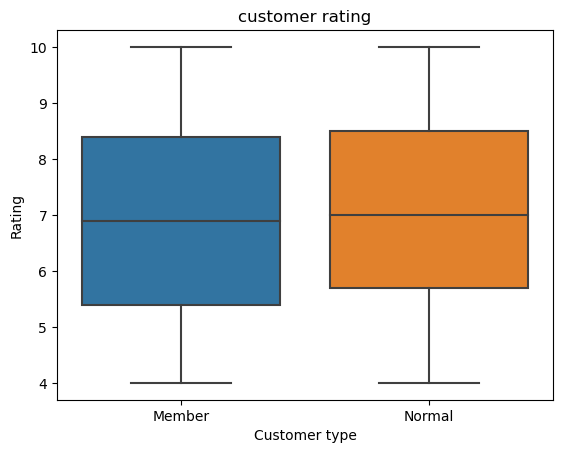

In [9]:
x=data["Customer type"]
y=data["Rating"]
plt.title("customer rating")
sns.boxplot(x='Customer type', y='Rating', data=data)

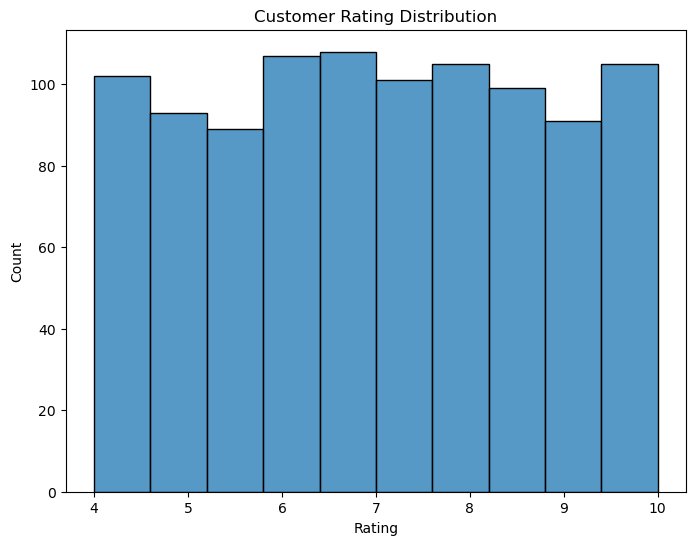

In [10]:
# Plot distribution of customer ratings
plt.figure(figsize=(8, 6))
sns.histplot(data['Rating'], bins=10)
plt.title('Customer Rating Distribution')
plt.show()

In [11]:
# Prepare data for modeling
X = data[['Unit price', 'Quantity', 'Branch', 'Payment', 'Customer type']]  # Features
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical variables
y = data['gross income'] 


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train

,Unit price,Quantity,Branch_Cairo,Branch_Giza,Payment_Credit card,Payment_Ewallet,Customer type_Normal
29,24.89,9,0,0,0,0,0
535,16.67,7,0,1,0,1,1
695,87.37,5,0,0,0,0,0
557,98.52,10,0,1,0,1,0
836,38.54,5,0,0,0,1,0
...,...,...,...,...,...,...,...
106,27.38,6,0,1,1,0,0
270,67.43,5,1,0,0,1,1
860,86.27,1,0,1,0,1,0
435,99.24,9,0,1,0,1,1


In [56]:
data[["gross income"]]

,gross income
0,26.1415
1,3.8200
2,16.2155
3,23.2880
4,30.2085
...,...
995,2.0175
996,48.6900
997,1.5920
998,3.2910


In [14]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
y_pred = model.predict(X_test)

In [16]:
model.score(X_test,y_test)

0.9992031133802021

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

r2,mae,mse


(0.9992031133802021, 0.2218914999999992, 0.11756156836549994)

In [18]:
import pickle as pkl
filename='SuperMarket Analysis.pkl'
pkl.dump(model,open(filename,'wb'))

In [19]:
loaded_model=pkl.load(open(filename,'rb'))
loaded_model

RandomForestRegressor(random_state=42)

In [20]:
import os

filename = 'SuperMarket Analysis.pkl'

if os.path.exists(filename):
    file_size = os.path.getsize(filename)
    print(f"File exists. Size: {file_size} bytes")
    if file_size == 0:
        print("Error: The file is empty.")
else:
    print("Error: The file does not exist.")


File exists. Size: 7280262 bytes


In [21]:
import gradio as gd
print(X.columns)

Index(['Unit price', 'Quantity', 'Branch_Cairo', 'Branch_Giza',
       'Payment_Credit card', 'Payment_Ewallet', 'Customer type_Normal'],
      dtype='object')


In [48]:
def Grade(Unit_price, Quantity, Branch_Cairo, Branch_Giza, Payment_Credit_card, Payment_Ewallet, Customer_type_Normal):
    input_data = pd.DataFrame({
        'Unit price': [Unit_price],
        'Quantity': [Quantity],
        'Branch_Cairo': [Branch_Cairo],
        'Branch_Giza': [Branch_Giza],
        'Payment_Credit card': [Payment_Credit_card],
        'Payment_Ewallet': [Payment_Ewallet],
        'Customer type_Normal': [Customer_type_Normal]})
    prediction=model.predict(input_data)
    return str(prediction[0])        

In [49]:
app=gd.Interface(fn=Grade,
                inputs=[gd.Number(label='Enter the Unit price',minimum=0,maximum=1000,value=0, precision=2),
                        gd.Number(label='Enter the Quantity', minimum=0,maximum=10,value=1, precision=0),
                        gd.Radio(['0','1'],label='Enter the Branch Cairo'),
                        gd.Radio(['0','1'],label='Enter the Branch Giza'),
                        gd.Radio(['0','1'],label='Enter the Payment_Credit_card'),
                        gd.Radio(['0','1'],label='Enter the Payment_Ewallet'),
                        gd.Radio(['0','1'],label='Enter the Customer_type_Normal')
                        ],
                outputs=gd.Label(),
                title='Developing an Ml model for predicting the Gross Income')

In [50]:
app.launch()

Running on local URL:  http://127.0.0.1:7865

To create a public link, set `share=True` in `launch()`.
